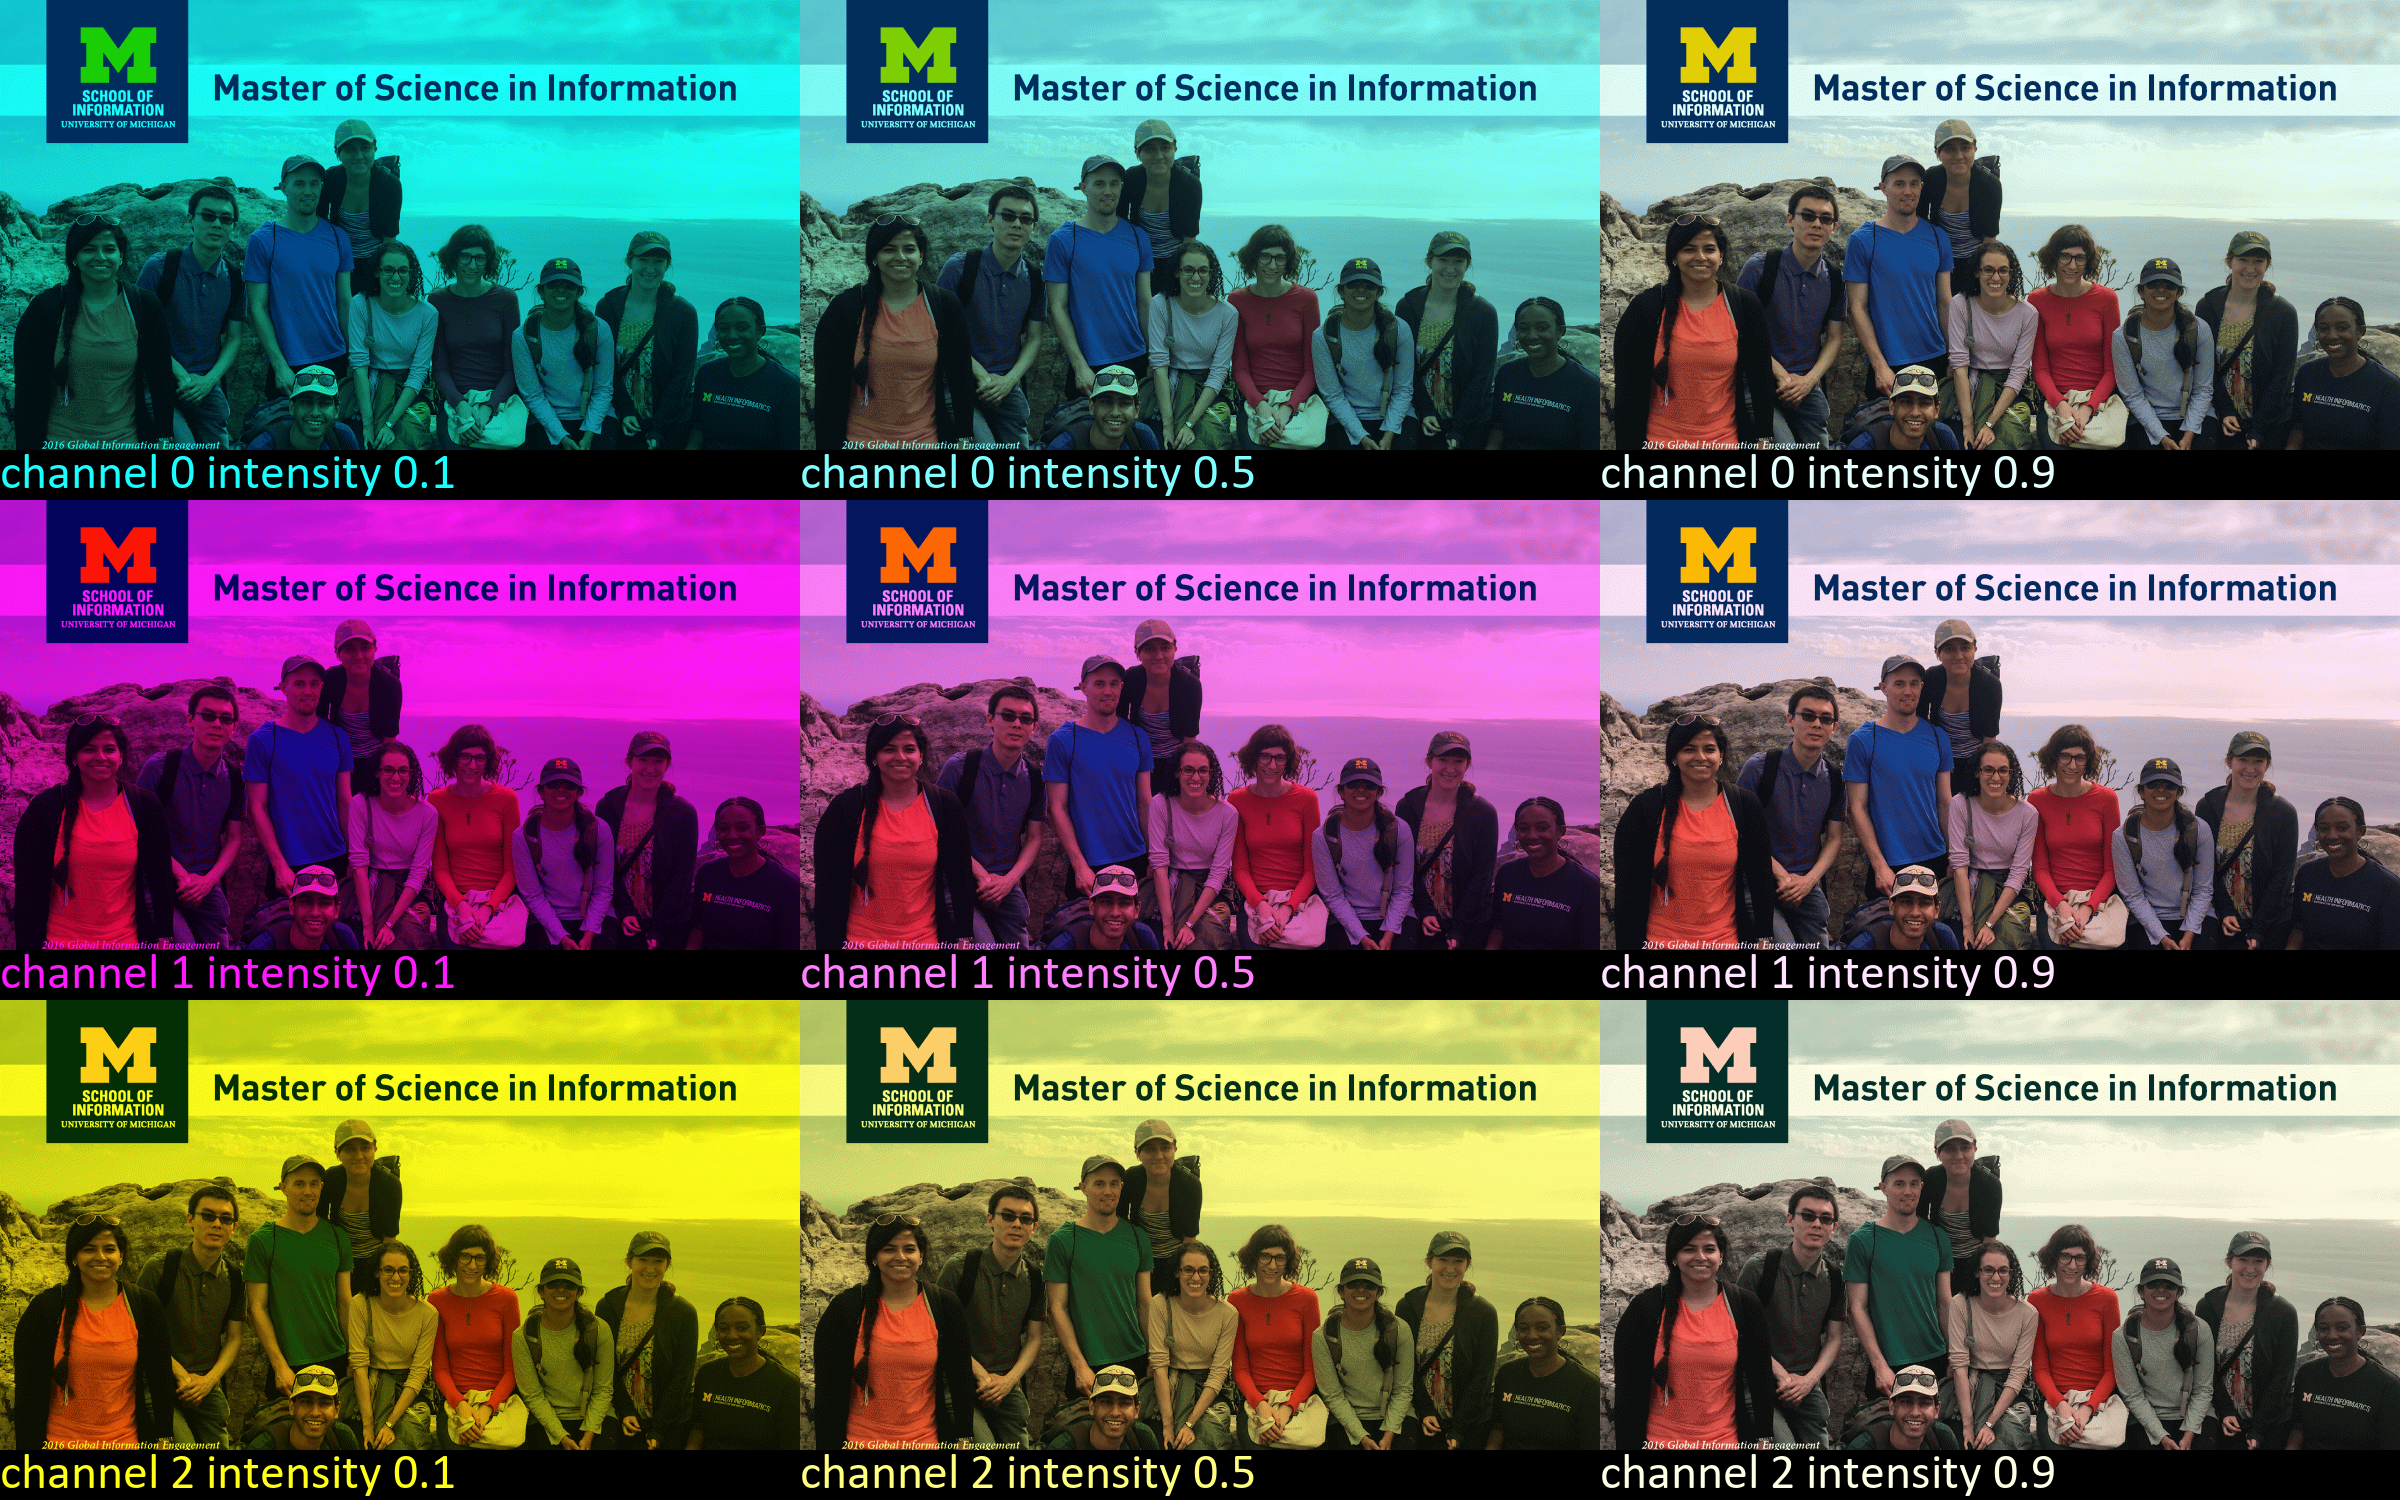

In [1]:
import PIL
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

file = "msi_recruitment.gif"
image = Image.open(file).convert('RGB')  # 800x450

ratio1 = 0.1 ; ratio2 = 0.1 ; ratio3 = 0.1 ; channel = 0
ratio_delta = 0.4
images = []


for r in range(9):
    if r <= 2: 
        pic = image.crop((0,0,800,500))
        font = ImageFont.truetype("calibri.ttf", size=50)
        draw = ImageDraw.Draw(pic)
        draw.text((0,450), 'channel 0 intensity ' + str(ratio1), fill=(255,255,255), font=font)
        r, g, b = pic.split()
        r = r.point(lambda i: i * ratio1)
        im = Image.merge( 'RGB', (r, g, b)) 
        ratio1 += ratio_delta

    elif 2< r <=5:
        pic = image.crop((0,0,800,500))
        font = ImageFont.truetype("calibri.ttf", size=50)
        draw = ImageDraw.Draw(pic)
        draw.text((0,450), 'channel 1 intensity ' + str(ratio2), fill=(255,255,255), font=font)
        r, g, b = pic.split() 
        g = g.point(lambda i: i * ratio2)
        im = Image.merge( 'RGB', (r, g, b)) 
        ratio2 += ratio_delta
    
    elif 5< r <=8:
        pic = image.crop((0,0,800,500))
        font = ImageFont.truetype("calibri.ttf", size=50)
        draw = ImageDraw.Draw(pic)
        draw.text((0,450), 'channel 2 intensity ' + str(ratio3), fill=(255,255,255), font=font)
        r, g, b = pic.split() 
        b= g.point(lambda i: i * ratio3)
        im = Image.merge( 'RGB', (r, g, b)) 
        ratio3 += ratio_delta

    images.append(im)

#images[8]

# make a contact sheet
contact_sheet=PIL.Image.new(images[0].mode, (images[0].width*3,images[0].height*3))

# canvas start original point
x=0
y=0

for img in images:
    contact_sheet.paste(img, (x,y))
    if x + images[0].width == contact_sheet.width:
        x = 0
        y += images[0].height
    else:
        x += images[0].width

display(contact_sheet)
